# Bank Marketing Data (A Data-Driven Approach to Predict the Success of Bank Telemarketing.)

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:<br /> 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]<br /> 
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.<br /> 
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).<br /> 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).<br /> 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).<br /> 

Attribute Information:<br /> 

Input variables:
## Bank client data:
1 - age (numeric)<br /> 
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br /> 
3 - marital : marital status (categorical: 'divorced','married','single')<br /> 
4 - education (categorical: 'unknown','primary','secondary','tertiary')<br /> 
5 - default: has credit in default? (categorical: 'no','yes')<br /> 
6 - housing: has housing loan? (categorical: 'no','yes')<br /> 
7 - loan: has personal loan? (categorical: 'no','yes')<br /> 
8 - balance: account balance (numeric)
## Related with the last contact of the current campaign:<br /> 
9 - contact: contact communication type (categorical: 'cellular','telephone','unknown')<br /> 
10 - day: last contact day  of the month(numeric: 1,2,...,31)<br /> 
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br /> 
12 - duration: last contact duration, in seconds (numeric). <br /> 
## Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br /> 
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br /> 
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br /> 
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')<br /> 

## Output variable (desired target):<br /> 
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [100]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from google.colab import drive 
# drive.mount('/content/gdrive')


In [101]:
df=pd.read_csv('bank.csv')

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [102]:
df.shape

(11162, 17)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [104]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [105]:
for column in df.select_dtypes(exclude=['int64']):
    print(column, df[column].unique())

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'other' 'failure' 'success']
deposit ['yes' 'no']


# Data Exploration
### 1. Explore All Categorical Features

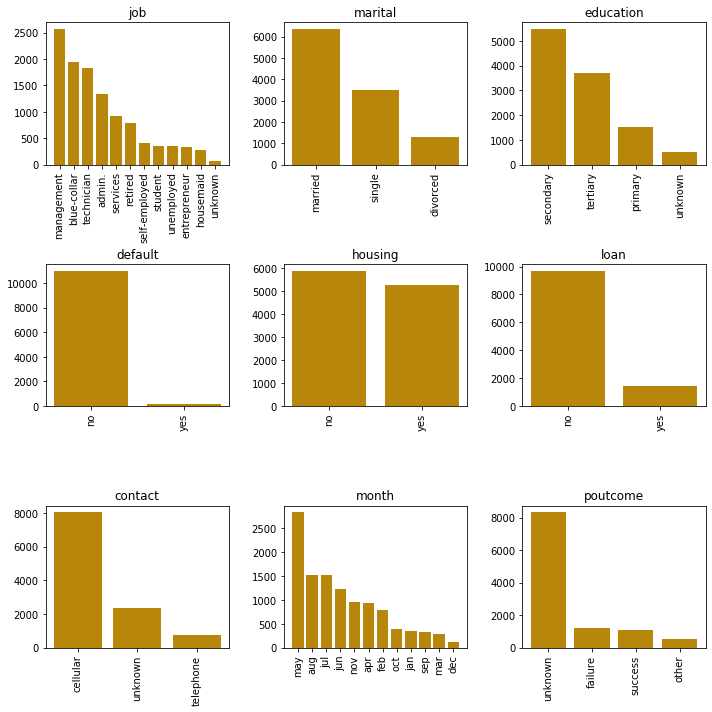

In [106]:
# 9 categoraical features
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (10, 10))

count = 0
for c in categorical_col:
    value_counts = df[c].value_counts()
    subplot_x = count // 3
    subplot_y = count % 3
    x_pos = np.arange(0, len(value_counts))  
    axs[subplot_x, subplot_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = 'darkgoldenrod')
    axs[subplot_x, subplot_y].set_title(c)
    
    for tick in axs[subplot_x, subplot_y].get_xticklabels():
        tick.set_rotation(90)
    count += 1

plt.tight_layout()
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()

### 2. Explore All Numerical Features

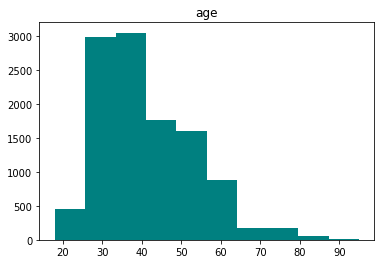

In [107]:
# age column
plt.hist(df['age'], color = 'teal')
plt.title('age')
plt.show()

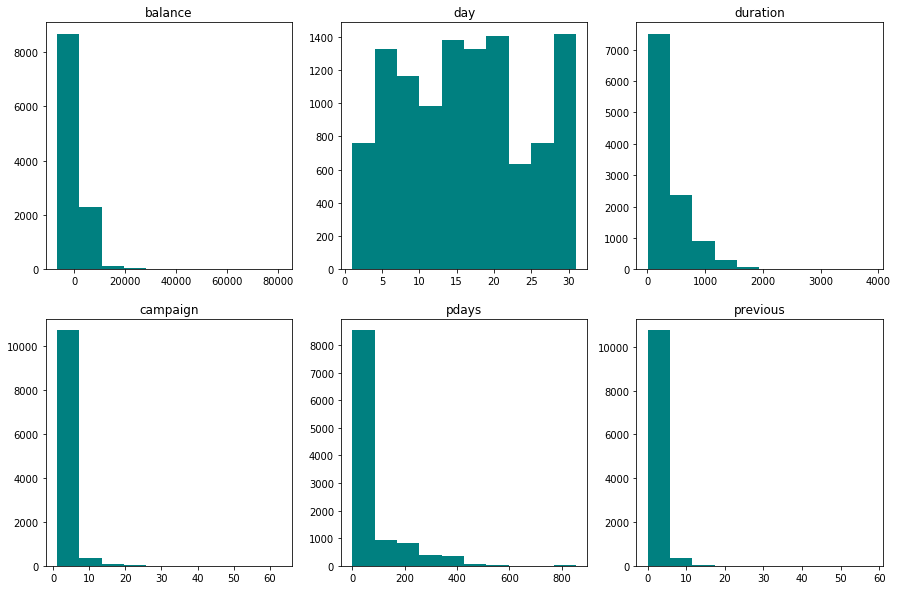

In [108]:
# 6 numerical features
numerical_col = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

count = 0
for n in numerical_col:
    subplot_x = count // 3
    subplot_y = count % 3
    
    axs[subplot_x, subplot_y].hist(df[n], color = 'teal')
    axs[subplot_x, subplot_y].set_title(n)
    
    count += 1

plt.show()

Most of the numerical columns have outliers and are not normally distributed. So we need to have a closer look at these columns to find out noisy data in the cleaning step.

# Correlation Matrix
Range: [-1, 1]
* No correlaiton r=0
* Very weak correlation: r<20
* Weak correlation: between 0.20-0.49
* Moderate correlation: between 0.5-0.79
* Strong correlation: between 0.8-0.99
* Perfect correlation: r=1


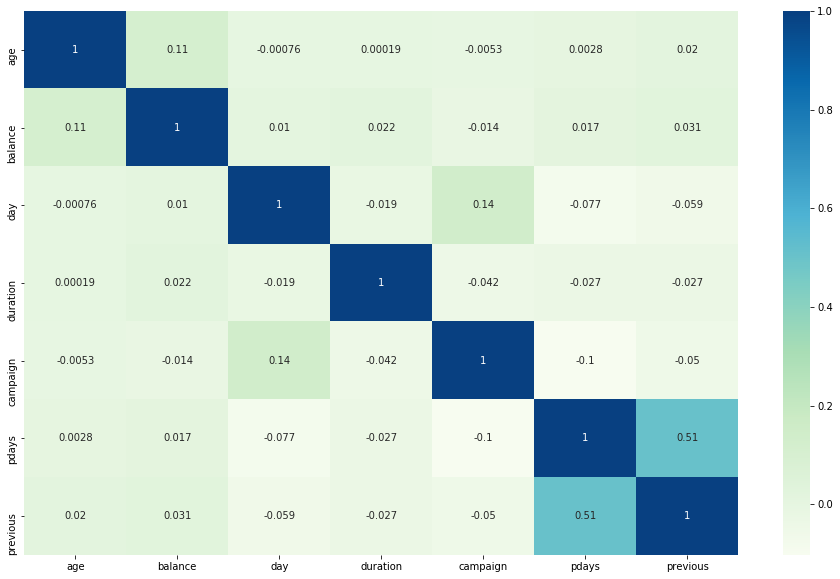

In [113]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="GnBu")
plt.show()

There is a moderate correlation (r = 0.51) between the days and the previous days. 

In [ ]:
Regarding the diagrams


Married customers are less likely to subscribe for term deposit.
Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

# Data Cleaning

### 1. Convert all 'yes' and 'no' column name to 1 and 0

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
df = df.replace("yes",1).replace("no",0)

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,not_previously_contacted
0,59,admin.,married,2,0,2343,1,0,unknown,1,2,1042,1,-1,0,unknown,1,1
1,56,admin.,married,2,0,45,0,0,unknown,1,2,1467,1,-1,0,unknown,1,1
2,41,technician,married,2,0,1270,1,0,unknown,1,2,1389,1,-1,0,unknown,1,1
3,55,services,married,2,0,2476,1,0,unknown,1,2,579,1,-1,0,unknown,1,1
4,54,admin.,married,3,0,184,0,0,unknown,1,2,673,2,-1,0,unknown,1,1


###  2. Check potential errors and consistency


In [15]:
# first, description error: -1 should indicate those that have never been previously contacted  
# second, check consistency with "pdays"
# Move people who was previously contacted but without exact poutcome("failure" or "success") to "others" 
# Move people who have never been contacted to "unknown"
df[(df['poutcome']=='others')&(df['pdays']==-1)] # empty dataset
inconsistent_indices = df[(df['poutcome']=='unknown')&(df['pdays']!=-1)].index
df.iloc[inconsistent_indices]['poutcome']='other'

df[(df['pdays']==-1)&(df['previous']!=0)]#empty dataset
df[(df['pdays']!=-1)&(df['previous']==0)];#empty dataset


/Users/tianxiangzhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### 3. Normalize numerical variables

In [16]:
# pdays
# distinguish newly contacted customers and customers that have been contacted before
# return 1 if newly contacted, and 0 if previously contacted
def distinguish_new(num):
  if num==-1:
    return 1
  else:
    return 0
df['not_previously_contacted'] = df['pdays'].apply(distinguish_new)


# Categorize day of a month (1:1-10; 2:11-20;3:21-31) 上中下旬
def convert_day(num):
  if num<=10:
    return 1
  elif num>10&num<=20:
    return 2
  else:
    return 3
df['day'] = df['day'].apply(convert_day)




### 4. Convert categorical variables


In [17]:
# education
# Description error: categories are 'secondary', 'tertiary', 'primary', 'unknown', 'other'
# Since it is ordinal, we convert them to numbers
print(df['education'].unique().tolist())
education_list = [ 'unknown', 'primary','secondary', 'tertiary']
def convert_education(string):
  return education_list.index(string)
df['education'] = df['education'].apply(convert_education)

['secondary', 'tertiary', 'primary', 'unknown']


In [18]:
# month
# categorize month by quarters
def convert_month(string):
  if string in ['jan','feb', 'mar']:
    return 1
  elif string in ['apr','may','jun']:
    return 2
  elif string in ['jul','aug','sep']:
    return 3
  elif string in ['oct','nov','dec']:
    return 4
df['month']=df['month'].apply(convert_month)    


### Train test split

In [19]:
y = df["deposit"]
X = df.drop(['deposit'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [87]:
X_train.shape

(8929, 30)

In [88]:
X_test.shape

(2233, 30)

### Further Analysis

In [20]:
# check outliers
def outlier_range(serie):
  IQR = np.percentile(serie,75)-np.percentile(serie,25)
  min_val = np.percentile(serie,25) - 1.5*IQR
  max_val = np.percentile(serie,75) + 1.5*IQR
  return (min_val, max_val)

def outlier_calculation(serie, _range):
  count = 0
  min_val = _range[0]
  max_val = _range[1]
  largest = serie[0]
  smallest = serie[0]
  for num in serie:
    if num<min_val:
      count += 1
      if num<smallest:
        smallest = num
    elif num>max_val:
      count += 1
      if num>largest:
        largest = num
  IQR = (max_val-min_val)/4
  ratio_of_smallest = (smallest-min_val)/IQR   #how small is the outlier
  ratio_of_largest = (largest-max_val)/IQR #how big is the outlier
  largest_outlier_ratio = max(abs(ratio_of_smallest),ratio_of_largest)
  return (count/len(X_train),largest_outlier_ratio)


In [21]:
# Further outlier analysis
# proportion of deposited people when they are outliers
def outlier_deposit_proportion(serie, _range):
  deposited = 0
  total_outliers = 0
  for i in range(len(serie)):
    if serie[i]<_range[0] or serie[i]>_range[1]:
      total_outliers += 1
      if y_train[i]==1:
        deposited+=1
  return deposited/total_outliers


In [22]:
# age
range_age = outlier_range(X_train['age'])
outlier_percentage = outlier_calculation(X_train['age'],range_age)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['age'],range_age)[1]
print("The percentage of outliers in 'age' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))

#small % outlier, and makes sense in real life.

The percentage of outliers in 'age' column is 1.4783290402060703%.
The largest outlier is 1.2647058823529411 IQR above/below the outlier range.


In [23]:
# balance
range_balance = outlier_range(X_train['balance'])
outlier_percentage = outlier_calculation(X_train['balance'],range_balance)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['balance'],range_balance)[1]
print("The percentage of outliers in 'balance' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))
print("")
# further analysis
print("Percentage of outliers that are deposited: {}%".format(outlier_deposit_proportion(X_train['balance'],range_balance)*100))
# We see that it's almost half-half for the outliers to have 0/1 value for the target. Therefore, we could possibly drop it.
X_train = X_train.drop(columns=['balance'])
X_test = X_test.drop(columns=['balance'])

The percentage of outliers in 'balance' column is 9.441146824952403%.
The largest outlier is 48.39956057752668 IQR above/below the outlier range.

Percentage of outliers that are deposited: 56.4650059311981%


In [24]:
# duration
range_duration = outlier_range(X_train['duration'])
outlier_percentage = outlier_calculation(X_train['duration'],range_duration)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['duration'],range_duration)[1]
print("The percentage of outliers in 'duration' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))

# small % outlier, and therefore disregarded. Moreover, note that longer duration implies higher interest, and also for such a high 
# duration, it implies that the customer is making the deposit right away. Otherwise, he/she will not bother to spend time asking 
# things that he/she is not interested in.

The percentage of outliers in 'duration' column is 5.778922611714638%.
The largest outlier is 8.043661971830986 IQR above/below the outlier range.


In [25]:
# campaign
range_campaign = outlier_range(X_train['campaign'])
outlier_percentage = outlier_calculation(X_train['campaign'],range_campaign)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['campaign'],range_campaign)[1]
print("The percentage of outliers in 'campaign' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))
# small % outlier, so disregard it.

The percentage of outliers in 'campaign' column is 5.398140889237316%.
The largest outlier is 28.5 IQR above/below the outlier range.


In [26]:
# pdays
range_pdays = outlier_range(X_train['pdays']) #(-33.625, 53.375)
outlier_percentage = outlier_calculation(X_train['pdays'],range_pdays)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['pdays'],range_pdays)[1]
print("The percentage of outliers in 'pdays' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))
print("")

# percentage of newly contacted customers 
print("Percentage of newly contacted customers: {}%".format(len(X_train[X_train['pdays']==-1])/len(X_train)*100))

# We see that there are a huge amount of newly contacted customers. Therefore, we restrict to only previously contacted customers
# previously contacted customers
previously_contacted = X_train[X_train['pdays']!=-1].reset_index(drop=True)
range_pdays_pc = outlier_range(previously_contacted['pdays'])
outlier_percentage_pc = outlier_calculation(previously_contacted['pdays'],range_pdays_pc)[0]*100
print("% outliers in 'pdays' column for previously contacted customers is {}%.".format(outlier_percentage_pc))
largest_outlier_ratio_pc = outlier_calculation(previously_contacted['pdays'],range_pdays_pc)[1]
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio_pc))

# Therefore, we see that there are really small amount of outliers, which are not too "outlier". Thus, we disregard it.

The percentage of outliers in 'pdays' column is 24.896404972561317%.
The largest outlier is 282.5 IQR above/below the outlier range.

Percentage of newly contacted customers: 74.89080524134842%
% outliers in 'pdays' column for previously contacted customers is 0.27998656064508903%.
The largest outlier is 2.036842105263158 IQR above/below the outlier range.


In [27]:
# previous
range_previous = outlier_range(X_train['previous'])
outlier_percentage = outlier_calculation(X_train['previous'],range_previous)[0]*100
largest_outlier_ratio = outlier_calculation(X_train['previous'],range_previous)[1]
print("The percentage of outliers in 'previous' column is {}%.".format(outlier_percentage))
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio))

# Similar analysis as in pdays
range_previous_pc =  outlier_range(previously_contacted['previous'])
outlier_percentage_pc = outlier_calculation(previously_contacted['previous'],range_previous_pc)[0]*100
print("% outliers in 'previous' column for previously contacted customers is {}%.".format(outlier_percentage_pc))
largest_outlier_ratio_pc = outlier_calculation(previously_contacted['previous'],range_pdays_pc)[1]
print("The largest outlier is {} IQR above/below the outlier range.".format(largest_outlier_ratio_pc))
# Therefore, we see that there are really small amount of outliers, which are not too "outlier". Thus, we disregard it.

The percentage of outliers in 'previous' column is 11.188262963377758%.
The largest outlier is 55.5 IQR above/below the outlier range.
% outliers in 'previous' column for previously contacted customers is 1.3103371038190168%.
The largest outlier is 1.0 IQR above/below the outlier range.


In [28]:
# Scaling numerical columns
# X_train
numerical_columns = X_train[['age','duration','campaign','pdays','previous']]
temporary = pd.DataFrame(StandardScaler().fit_transform(numerical_columns))
X_train['age']= temporary[0]
X_train['duration'] = temporary[1]
X_train['campaign']=temporary[2]
X_train['pdays']=temporary[3]
X_train['previous']=temporary[4]

# X_test
numerical_columns = X_test[['age','duration','campaign','pdays','previous']]
temporary = pd.DataFrame(StandardScaler().fit_transform(numerical_columns))
X_test['age']= temporary[0]
X_test['duration'] = temporary[1]
X_test['campaign']=temporary[2]
X_test['pdays']=temporary[3]
X_test['previous']=temporary[4]
X_test

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,not_previously_contacted
0,1.981436,retired,divorced,2,0,0,0,cellular,1,3,-0.560307,-0.543810,-0.501127,-0.352622,unknown,1
1,-0.265498,blue-collar,married,2,0,0,0,unknown,2,2,2.683794,2.325245,-0.501127,-0.352622,unknown,1
2,-0.515158,blue-collar,single,2,0,1,0,cellular,2,2,0.218732,-0.543810,2.255387,0.031665,failure,0
3,0.483480,blue-collar,married,2,0,0,0,cellular,1,3,1.151305,-0.185178,-0.501127,-0.352622,unknown,1
4,-0.515158,technician,married,3,0,1,0,unknown,2,2,-0.838941,0.173454,-0.501127,-0.352622,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,0.400260,unemployed,married,2,0,0,0,cellular,1,3,0.016864,0.890717,-0.501127,-0.352622,unknown,1
2229,0.649919,technician,married,1,0,1,0,unknown,1,2,-0.804823,-0.543810,-0.501127,-0.352622,unknown,1
2230,0.982798,technician,married,3,0,1,0,cellular,1,2,-0.921394,-0.543810,2.511807,0.031665,failure,0
2231,0.566699,unemployed,married,2,0,0,0,cellular,2,3,0.355206,-0.185178,1.138129,3.490254,success,0


In [29]:
# convert all dummy variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

### Final Cleaned Data

In [30]:
X_train

,age,education,default,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,-1.114041,3,0,0,0,1,3,1.941942,0.921804,1.374037,...,0,0,0,0,1,0,0,0,0,0
1,-0.609278,2,0,0,0,2,3,-0.162532,0.182456,-0.476209,...,0,0,0,1,0,0,0,0,0,1
2,0.568501,2,0,0,0,1,4,0.646881,-0.556892,0.370670,...,0,1,0,0,0,0,0,0,1,0
3,0.989136,3,0,0,0,2,4,-0.055574,-0.556892,-0.476209,...,0,0,0,1,0,0,0,0,0,1
4,0.989136,3,0,0,0,2,4,-0.590364,0.182456,0.425901,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,0.484374,3,0,1,0,2,3,-0.838970,-0.187218,-0.476209,...,0,0,0,1,0,0,0,0,0,1
8925,-1.114041,3,0,0,0,2,4,0.227721,-0.187218,-0.163232,...,0,0,0,0,1,0,0,0,1,0
8926,-0.525151,2,0,0,0,2,3,-0.500751,3.879196,-0.476209,...,1,0,0,1,0,0,0,0,0,1
8927,0.820882,3,0,0,0,2,3,0.005132,0.921804,-0.476209,...,0,0,0,1,0,0,0,0,0,1


In [31]:
y_train

0       1
1       0
2       1
3       1
4       1
       ..
8924    0
8925    1
8926    0
8927    1
8928    0
Name: deposit, Length: 8929, dtype: int64

In [32]:
X_test

,age,education,default,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1.981436,2,0,0,0,1,3,-0.560307,-0.543810,-0.501127,...,0,0,0,0,0,0,0,0,0,1
1,-0.265498,2,0,0,0,2,2,2.683794,2.325245,-0.501127,...,0,0,0,1,0,0,1,0,0,1
2,-0.515158,2,0,1,0,2,2,0.218732,-0.543810,2.255387,...,0,0,0,0,1,0,0,0,0,0
3,0.483480,2,0,0,0,1,3,1.151305,-0.185178,-0.501127,...,0,0,0,1,0,0,0,0,0,1
4,-0.515158,3,0,1,0,2,2,-0.838941,0.173454,-0.501127,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,0.400260,2,0,0,0,1,3,0.016864,0.890717,-0.501127,...,0,1,0,1,0,0,0,0,0,1
2229,0.649919,1,0,1,0,1,2,-0.804823,-0.543810,-0.501127,...,1,0,0,1,0,0,1,0,0,1
2230,0.982798,3,0,1,0,1,2,-0.921394,-0.543810,2.511807,...,1,0,0,1,0,0,0,0,0,0
2231,0.566699,2,0,0,0,2,3,0.355206,-0.185178,1.138129,...,0,1,0,1,0,0,0,0,1,0


In [33]:
y_test

0       0
1       1
2       1
3       1
4       0
       ..
2228    1
2229    0
2230    0
2231    1
2232    0
Name: deposit, Length: 2233, dtype: int64